# Elastic Net

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#import tensorflow as tf
# Para que funcione con la version 2 instalada
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [4]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

- $x\in\mathbb R^3$
- $A \in \mathbb R_{3\times 1}$
- $y = Ax+b\in \mathbb R$

In [5]:
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [6]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target- y_pred)),e1_term), e2_term), 0)

In [7]:
init = tf.global_variables_initializer()
session.run(init)

In [8]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)

In [9]:
loss_vec = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[0.59768355]
 [0.20571941]
 [1.4388403 ]], b = [[1.20188]]Loss: [2.2707915]
Paso #200A = [[0.7006022 ]
 [0.18488611]
 [1.2896985 ]], b = [[1.2561023]]Loss: [1.8741556]
Paso #300A = [[0.7518515 ]
 [0.17532717]
 [1.1584826 ]], b = [[1.2981927]]Loss: [1.7835793]
Paso #400A = [[0.78387827]
 [0.18264863]
 [1.0454688 ]], b = [[1.3360004]]Loss: [1.5751052]
Paso #500A = [[0.7969777 ]
 [0.19347255]
 [0.94353026]], b = [[1.3692131]]Loss: [1.4321346]
Paso #600A = [[0.80546767]
 [0.2149403 ]
 [0.8541034 ]], b = [[1.401444]]Loss: [1.3535348]
Paso #700A = [[0.8035902]
 [0.2339896]
 [0.771857 ]], b = [[1.4306599]]Loss: [1.2493165]
Paso #800A = [[0.79938906]
 [0.2566937 ]
 [0.6980414 ]], b = [[1.4592898]]Loss: [1.1749358]
Paso #900A = [[0.79165924]
 [0.27525353]
 [0.6285965 ]], b = [[1.486578]]Loss: [1.0896347]
Paso #1000A = [[0.78290623]
 [0.30000737]
 [0.5674385 ]], b = [[1.5137708]]Loss: [1.0690874]


In [10]:
slope = session.run(A)
[[intercept]] = session.run(b)
print("y="+str(slope[0][0])+"x1+"+str(slope[1][0])+"x2+"+str(slope[2][0])+"x3+"+str(intercept))

y=0.78290623x1+0.30000737x2+0.5674385x3+1.5137708


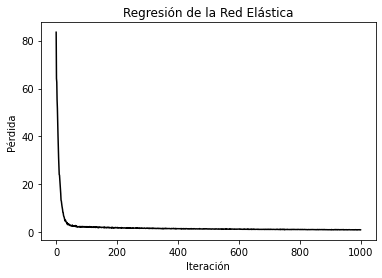

In [11]:
plt.plot(loss_vec, 'k-')
plt.title("Regresión de la Red Elástica")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.show()